<hr style="height:1px;border-width:0;color:gray;background-color:#87805E">

# <font color="E38B29"> <center>CSA301 - Deep Learning : Autumn Semester 2023

# <font color="E38B29"> <center>Practical Test - SET B : [15 Marks]</center>
# <font color="E38B29"> <center>Duration : 1 Hr : 30 Minutes</center>
# <hr>

## <font color = "red"> **Note**: Rename your file as "**CS/IT/AI_Student Number**". You might lose marks for not reading the questions carefully. Do not forget to change the runtime type to `GPU` for faster training.

### **INSTRUCTIONS**

### 1. Load the CIFAR-10 dataset via the Keras API and assign to `X_train, X_test, y_train, y_test`. <font color = "red">[1 Mark]

In [1]:
# Write your solution here
from tensorflow.keras.datasets import cifar10

(X_train, X_test), (y_train, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


### 2. How many training and testing images are there? <font color="red">[0.5 Mark]</font>

In [6]:
# Write your solution here
print("X_train:", X_train.shape[:1])
print("X_test:", X_test.shape[:1])
print("y_train:", y_train.shape[:1])
print("y_test:", y_test.shape[:1])

X_train: (50000,)
X_test: (50000,)
y_train: (10000,)
y_test: (10000,)


### 3. What are the dimension and channel of the cifar-10 images? <font color="red">[0.5 Mark]</font>

In [7]:
# Write your solution here
print("Dimension and Channel:", X_train.shape[1:])

Dimension and Channel: (32, 32, 3)


### 4. Plot 9 images from the cifar-10 dataset. <font color="red">[1 Mark]</font>

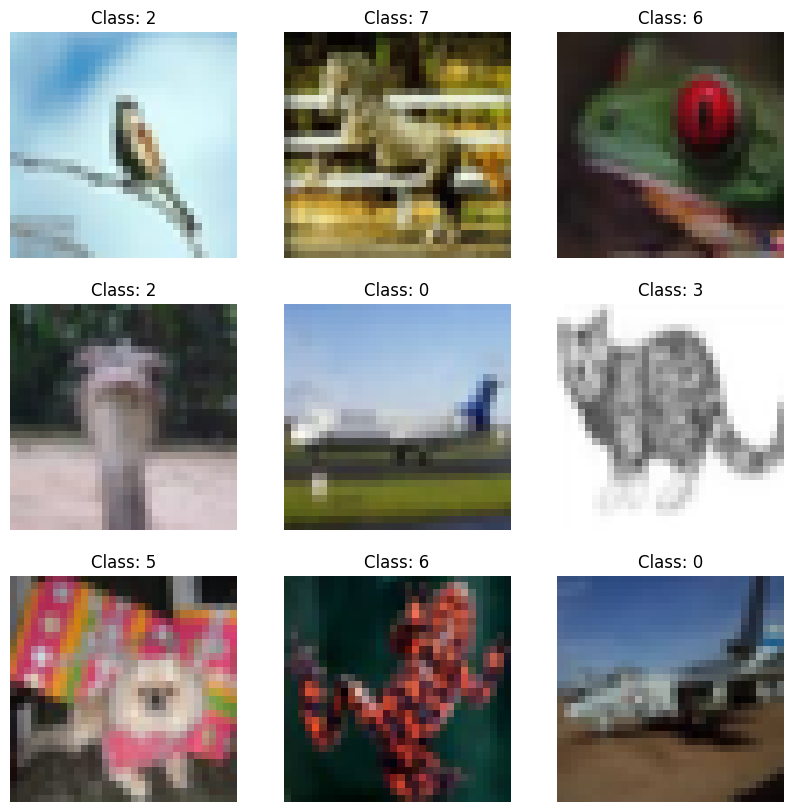

In [8]:
# Code to plot 9 random images
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset
(X_train, y_train), (_, _) = cifar10.load_data()

# Select 9 random indices
indices = np.random.choice(X_train.shape[0], 9, replace=False)

# Plot the images
plt.figure(figsize=(10, 10))
for i, idx in enumerate(indices, 1):
    plt.subplot(3, 3, i)
    plt.imshow(X_train[idx])
    plt.title(f"Class: {y_train[idx][0]}")
    plt.axis('off')

plt.show()

### 5. Create a `train_data_gen` and `test_data_gen` using `ImageDataGenerator`. For `train_data_gen`, use data augmentation: `rescale`, `vertical_flip`, `zoom_range = 0.1`, `height_shift_range = 0.2`. <font color="red">[1 Mark]</font>

In [11]:
# Code for train_data_gen
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import cifar10

train_datagen = ImageDataGenerator(
    rescale=1./255,
    vertical_flip=True,
    zoom_range=0.1,
    height_shift_range=0.2
)

In [12]:
# Code for test_data_gen
test_datagen = ImageDataGenerator(rescale=1./255)

### 6. Create a data generator called `train_data` and `test_data` using the `flow()` method. You need to specify `batch size = 64`. <font color="red">[1 Mark]</font>

In [21]:
from tensorflow.keras.utils import to_categorical

In [51]:
# Rescale pixel values to the range [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [55]:
# Code for train_data
batch_size = 64
train_data = train_datagen.flow(X_train, y_train, batch_size=batch_size, shuffle=True)

In [56]:
# Code for test_data
test_data = test_datagen.flow(X_test, y_test, batch_size=batch_size, shuffle=False)

### 7. Create a convolutional neural network architecture by referring to the image. **Note:** `The network architecture should be same as the given image`. <font color="red">[2 Mark]</font>

![picture](https://i.ibb.co/bWdFz1B/set-B.png)

In [57]:
# Code for model architecture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense

model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3), name='conv2d_6'))
model.add(BatchNormalization(name='batch_normalization_2'))
model.add(Activation('relu', name='activation_4'))


model.add(Conv2D(32, (3, 3), padding='same', name='conv2d_7'))
model.add(Activation('relu', name='activation_5'))


model.add(MaxPooling2D(pool_size=(2, 2), name='max_pooling2d_3'))

model.add(Conv2D(64, (3, 3), padding='valid', name='conv2d_8'))


model.add(MaxPooling2D(pool_size=(2, 2), name='max_pooling2d_4'))

model.add(Flatten(name='flatten_1'))

model.add(Dense(512, activation='relu', name='dense_3'))


model.add(Dense(512, activation='relu', name='dense_4'))

model.add(Dense(10, activation='softmax', name='dense_5'))

### 8. View the summary of the model. <font color="red">[0.5 Mark]</font>

In [58]:
# Model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_2 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 activation_4 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_5 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                 

### 9. Specify an `SGD` optimizer with the learning rate of `0.001` and save it to variable `optimzer`. <font color="red">[0.5 Mark]</font>

In [59]:
import tensorflow

from tensorflow.keras.optimizers import SGD

optimizer = SGD(learning_rate=0.001)

### 10. Compile the model with revelant parameters. <font color="red">[1 Mark]</font>

In [63]:
# Compile code
model.compile(optimizer=optimizer, metrics=["accuracy"], loss="categorical_crossentropy")

### 11. Define `EarlyStopping` callbacks with parameters: `monitor, patience = 2, verbose = 1, mode = 'max'`. Assign EarlyStopping callback to `early_stop` variable. Also define `ModelCheckpoint` callbacks with parameters `monitor`, `mode = 'max'`. Assign CSVLogger to `checkpoint` variable. <font color="red">[1 Mark]</font>

In [64]:
# Callbacks code
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger

# Define EarlyStopping callback
early_stop = EarlyStopping(
    monitor='val_accuracy',  # Change 'val_accuracy' to the metric you want to monitor
    patience=2,
    verbose=1,
    mode='max'
)

# Define ModelCheckpoint callback
checkpoint = ModelCheckpoint(
    filepath='best_model.h5',  # Change the filepath as needed
    monitor='val_accuracy',  # Change 'val_accuracy' to the metric you want to monitor
    save_best_only=True,
    mode='max'
)

# Define CSVLogger callback (optional)
csv_logger = CSVLogger('training.log')

### 12. Fit the neural network for 5 epochs. Use relevant parameters to successfully train the model. <font color="red">[1 Mark]</font>

In [65]:
history = model.fit(
    train_data,
    epochs=5,
    validation_data=test_data,
    callbacks=[early_stop]
)

Epoch 1/5
782/782 [==============================] - 44s 44ms/step - loss: nan - accuracy: 0.9719 - val_loss: nan - val_accuracy: 1.0000
Epoch 2/5
782/782 [==============================] - 34s 44ms/step - loss: nan - accuracy: 1.0000 - val_loss: nan - val_accuracy: 1.0000
Epoch 3/5
782/782 [==============================] - 38s 48ms/step - loss: nan - accuracy: 1.0000 - val_loss: nan - val_accuracy: 1.0000
Epoch 3: early stopping


### 13. Explain the training logs. <font color="red">[1 Mark]</font>

**Answer**:Training logs provide crucial information during the training of a neural network. For each epoch, the logs typically include the epoch number, training loss, training accuracy, validation loss, and validation accuracy. These values offer insights into the model's performance, showcasing how well it is learning from the training data and generalizing to unseen validation data. Monitoring these metrics aids in adjusting hyperparameters, detecting overfitting or underfitting, and making informed decisions to optimize the model's performance. The logs serve as a key tool for assessing and improving the training process.

### 14. Find out the train and test accuracy of the model. <font color="red">[1 Mark]</font>

In [68]:

train_loss, train_accuracy = model.evaluate(train_data)

test_loss, test_accuracy = model.evaluate(test_data)

print("Train accuracy:", train_accuracy)
print("Test accuracy:", train_accuracy)

157/157 [==============================] - 1s 7ms/step - loss: nan - accuracy: 1.0000
Train accuracy: 1.0
Test accuracy: 1.0


### 15. Plot the confusion matrix and classification report of test data. <font color="red">[2 Mark]</font>

**Use**: `class_names = ["T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]`

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical

313/313 [==============================] - 1s 2ms/step


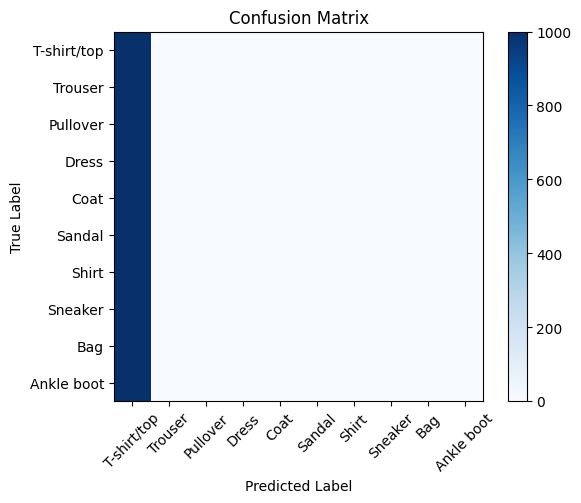

Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.10      1.00      0.18      1000
     Trouser       0.00      0.00      0.00      1000
    Pullover       0.00      0.00      0.00      1000
       Dress       0.00      0.00      0.00      1000
        Coat       0.00      0.00      0.00      1000
      Sandal       0.00      0.00      0.00      1000
       Shirt       0.00      0.00      0.00      1000
     Sneaker       0.00      0.00      0.00      1000
         Bag       0.00      0.00      0.00      1000
  Ankle boot       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [74]:
# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred_classes, target_names=class_names))

# <hr>
# <font color="E38B29"> <center> All The Best</center>
# <hr>